# DATA EXPLORATION PHASE

In [1]:
import pandas as pd

In [2]:
vaccinations = pd.read_csv('cumulative-covid-vaccinations.csv')
covid = pd.read_csv('WHO-COVID-19-global-data.csv')

In [3]:
vaccinations.head(20)

,Entity,Code,Day,total_vaccinations
0,Afghanistan,AFG,2021-02-22,0
1,Afghanistan,AFG,2021-02-28,8200
2,Afghanistan,AFG,2021-03-16,54000
3,Afghanistan,AFG,2021-04-07,120000
4,Afghanistan,AFG,2021-04-22,240000
5,Afghanistan,AFG,2021-05-11,504502
6,Afghanistan,AFG,2021-05-20,547901
7,Afghanistan,AFG,2021-05-24,573277
8,Afghanistan,AFG,2021-05-26,590454
9,Afghanistan,AFG,2021-05-27,593313


In [4]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
covid.shape, vaccinations.shape

((254775, 8), (69563, 4))

In [6]:
covid.isna().sum()

Date_reported           0
Country_code         1075
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [7]:
vaccinations.isna().sum()

Entity                    0
Code                  11256
Day                       0
total_vaccinations        0
dtype: int64

In [8]:
covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.547750e+05,2.547750e+05,254775.000000,2.547750e+05
mean,2.531979e+03,1.011326e+06,26.035200,1.501434e+04
std,1.610330e+04,4.812106e+06,147.586538,6.617338e+04
min,-6.273400e+04,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,7.640000e+02,0.000000,8.000000e+00
50%,1.700000e+01,2.126800e+04,0.000000,2.660000e+02
75%,4.390000e+02,2.734010e+05,5.000000,4.230000e+03
max,1.265520e+06,9.807247e+07,11447.000000,1.074367e+06


In [9]:
vaccinations.describe()

,total_vaccinations
count,6.956300e+04
mean,3.585539e+08
std,1.377471e+09
min,0.000000e+00
25%,1.321744e+06
50%,9.886853e+06
75%,6.885949e+07
max,1.304946e+10


In [10]:
print(f"{vaccinations.columns} \n\n {covid.columns}")

Index(['Entity', 'Code', 'Day', 'total_vaccinations'], dtype='object') 

 Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')


In [11]:
print(f"{vaccinations.dtypes} \n\n {covid.dtypes}")

Entity                object
Code                  object
Day                   object
total_vaccinations     int64
dtype: object 

 Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object


In [12]:
covid.value_counts('Country')

Country
Afghanistan                                                 1075
Peru                                                        1075
Nigeria                                                     1075
Niue                                                        1075
North Macedonia                                             1075
                                                            ... 
Grenada                                                     1075
Guadeloupe                                                  1075
Guam                                                        1075
Guatemala                                                   1075
occupied Palestinian territory, including east Jerusalem    1075
Length: 237, dtype: int64

In [13]:
vaccinations.value_counts('Entity')

Entity
High income                        741
World excl. China                  741
World                              741
Europe                             741
European Union                     739
                                  ... 
Niue                                 6
Saint Helena                         6
Falkland Islands                     6
Turkmenistan                         3
Bonaire Sint Eustatius and Saba      2
Length: 236, dtype: int64

In [14]:
vaccinations.Day.min(), vaccinations.Day.max()

('2020-12-02', '2022-12-12')

In [15]:
covid.count(), vaccinations.count()

(Date_reported        254775
 Country_code         253700
 Country              254775
 WHO_region           254775
 New_cases            254775
 Cumulative_cases     254775
 New_deaths           254775
 Cumulative_deaths    254775
 dtype: int64,
 Entity                69563
 Code                  58307
 Day                   69563
 total_vaccinations    69563
 dtype: int64)

# DATA CLEANING PHASE

In [16]:
vaccinations = vaccinations.drop('Code', axis=1)

In [17]:
covid = covid.drop(columns=['Country_code'])

In [18]:
vaccinations['Day'] = pd.to_datetime(vaccinations['Day'])

In [19]:
covid['Day'] = pd.to_datetime(covid['Date_reported'])

In [20]:
covid.Day.min(), covid.Day.max()

(Timestamp('2020-01-03 00:00:00'), Timestamp('2022-12-12 00:00:00'))

In [21]:
covid = covid.drop(columns=['Date_reported'])

In [22]:
vaccinations = vaccinations.rename(columns={"Entity": "Country"})

In [23]:
covid.set_index("Country", inplace=True)
vaccinations.set_index("Country", inplace=True)

In [24]:
covid_with_vaccinations = pd.merge(
    covid,vaccinations, on=['Country','Day'], how='outer'
)
covid_with_vaccinations.head(3000)

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
Country,,,,,,,
Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-03,NaN
Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-04,NaN
Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-05,NaN
Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-06,NaN
Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-07,NaN
...,...,...,...,...,...,...,...
Algeria,AFRO,1.0,265772.0,0.0,6875.0,2022-04-27,NaN
Algeria,AFRO,1.0,265773.0,0.0,6875.0,2022-04-28,NaN
Algeria,AFRO,3.0,265776.0,0.0,6875.0,2022-04-29,NaN


In [25]:
covid_with_vaccinations = covid_with_vaccinations.reset_index()

# DATA ANALYSIS AND VISUALIZATION PHASE

In [26]:
co_w_va_cumul = covid_with_vaccinations.groupby('Country').max().sort_values(by='Cumulative_cases', ascending=False)
co_w_va_cumul

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
Country,,,,,,,
United States of America,AMRO,1265520.0,98072469.0,5061.0,1074367.0,2022-12-12,NaN
India,SEARO,414188.0,44674981.0,6148.0,530658.0,2022-12-12,2.199695e+09
France,EURO,500563.0,37361707.0,2003.0,155988.0,2022-12-12,1.524023e+08
Germany,EURO,307917.0,36758926.0,1296.0,158966.0,2022-12-12,1.900444e+08
Brazil,AMRO,298408.0,35497781.0,4249.0,690577.0,2022-12-12,4.765237e+08
...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,2022-12-07,3.786099e+07
Vietnam,NaN,NaN,NaN,NaN,NaN,2022-12-01,2.646359e+08
Wales,NaN,NaN,NaN,NaN,NaN,2022-11-30,8.486260e+06


In [27]:
co_w_va_cumul = co_w_va_cumul.reset_index()

In [28]:
co_w_va_cumul = co_w_va_cumul.groupby('Cumulative_cases').max().sort_values(by='Cumulative_cases', ascending=False)
co_w_va_cumul.head(20)

,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
Cumulative_cases,,,,,,,
98072469.0,United States of America,AMRO,1265520.0,5061.0,1074367.0,2022-12-12,NaN
44674981.0,India,SEARO,414188.0,6148.0,530658.0,2022-12-12,2.199695e+09
37361707.0,France,EURO,500563.0,2003.0,155988.0,2022-12-12,1.524023e+08
36758926.0,Germany,EURO,307917.0,1296.0,158966.0,2022-12-12,1.900444e+08
35497781.0,Brazil,AMRO,298408.0,4249.0,690577.0,2022-12-12,4.765237e+08
27754149.0,Republic of Korea,WPRO,621328.0,470.0,31099.0,2022-12-12,NaN
26069823.0,Japan,WPRO,326090.0,464.0,51702.0,2022-12-12,3.593136e+08
24709404.0,Italy,EURO,228123.0,993.0,182419.0,2022-12-12,1.430571e+08
24053576.0,The United Kingdom,EURO,275647.0,1370.0,197723.0,2022-12-12,NaN


In [29]:
co_w_va_cumul = co_w_va_cumul.reset_index()

In [30]:
top_20_cumul_cases = co_w_va_cumul[:21]
top_20_cumul_cases

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
0,98072469.0,United States of America,AMRO,1265520.0,5061.0,1074367.0,2022-12-12,NaN
1,44674981.0,India,SEARO,414188.0,6148.0,530658.0,2022-12-12,2.199695e+09
2,37361707.0,France,EURO,500563.0,2003.0,155988.0,2022-12-12,1.524023e+08
3,36758926.0,Germany,EURO,307917.0,1296.0,158966.0,2022-12-12,1.900444e+08
4,35497781.0,Brazil,AMRO,298408.0,4249.0,690577.0,2022-12-12,4.765237e+08
5,27754149.0,Republic of Korea,WPRO,621328.0,470.0,31099.0,2022-12-12,NaN
6,26069823.0,Japan,WPRO,326090.0,464.0,51702.0,2022-12-12,3.593136e+08
7,24709404.0,Italy,EURO,228123.0,993.0,182419.0,2022-12-12,1.430571e+08
8,24053576.0,The United Kingdom,EURO,275647.0,1370.0,197723.0,2022-12-12,NaN
9,21671528.0,Russian Federation,EURO,203949.0,1254.0,392661.0,2022-12-12,NaN


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

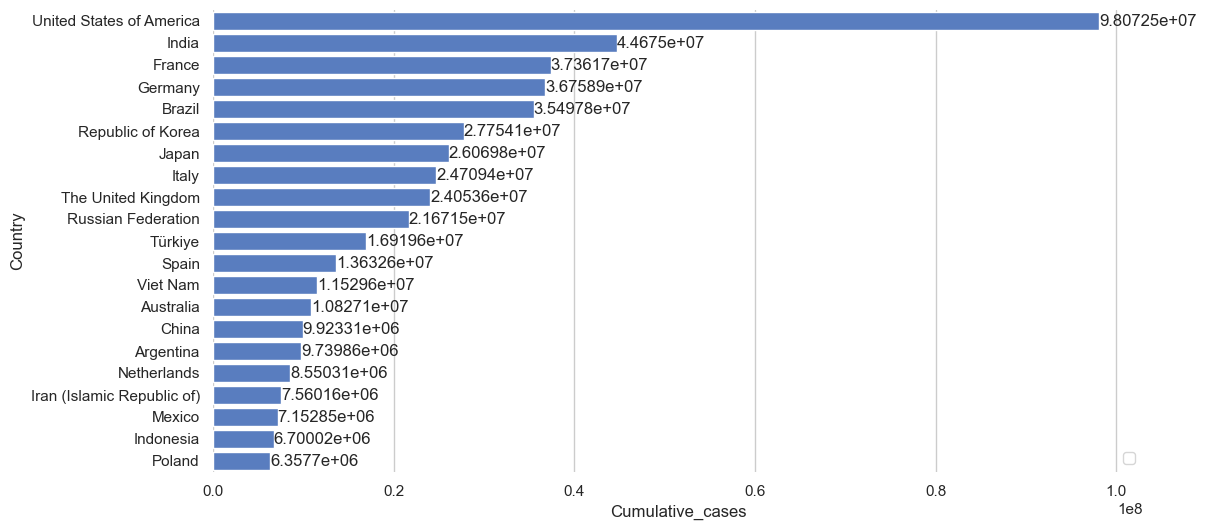

In [32]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("muted")
sns.barplot(x='Cumulative_cases', y="Country", data=top_20_cumul_cases, color="b")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)

In [33]:
co_w_va_cumul

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
0,98072469.0,United States of America,AMRO,1265520.0,5061.0,1074367.0,2022-12-12,NaN
1,44674981.0,India,SEARO,414188.0,6148.0,530658.0,2022-12-12,2.199695e+09
2,37361707.0,France,EURO,500563.0,2003.0,155988.0,2022-12-12,1.524023e+08
3,36758926.0,Germany,EURO,307917.0,1296.0,158966.0,2022-12-12,1.900444e+08
4,35497781.0,Brazil,AMRO,298408.0,4249.0,690577.0,2022-12-12,4.765237e+08
...,...,...,...,...,...,...,...,...
230,736.0,Saba,AMRO,126.0,1.0,2.0,2022-12-12,NaN
231,198.0,Niue,WPRO,22.0,0.0,0.0,2022-12-12,4.048000e+03
232,26.0,Holy See,EURO,7.0,0.0,0.0,2022-12-12,NaN
233,4.0,Pitcairn Islands,WPRO,4.0,0.0,0.0,2022-12-12,NaN


In [34]:
# co_w_va_cumul = co_w_va_cumul.dropna(thresh=2, inplace=True)

In [35]:
co_w_va_cumul[-20:]

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
215,6389.0,Cook Islands,WPRO,420.0,1.0,1.0,2022-12-12,40781.0
216,6279.0,Sao Tome and Principe,AFRO,319.0,4.0,77.0,2022-12-12,227825.0
217,5933.0,Palau,WPRO,322.0,6.0,7.0,2022-12-12,NaN
218,5382.0,Saint Barthélemy,AMRO,502.0,2.0,5.0,2022-12-12,NaN
219,4621.0,Nauru,WPRO,1241.0,1.0,1.0,2022-12-12,25172.0
220,3904.0,Anguilla,AMRO,196.0,1.0,12.0,2022-12-12,24441.0
221,3430.0,Kiribati,WPRO,350.0,5.0,13.0,2022-12-12,193491.0
222,3415.0,Wallis and Futuna,WPRO,2654.0,7.0,7.0,2022-12-12,17959.0
223,3274.0,Saint Pierre and Miquelon,AMRO,577.0,1.0,1.0,2022-12-12,NaN
224,2779.0,Tuvalu,WPRO,998.0,0.0,0.0,2022-12-12,25591.0


In [36]:
bottom_20_cumul_cases = co_w_va_cumul[-20:]
bottom_20_cumul_cases

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
215,6389.0,Cook Islands,WPRO,420.0,1.0,1.0,2022-12-12,40781.0
216,6279.0,Sao Tome and Principe,AFRO,319.0,4.0,77.0,2022-12-12,227825.0
217,5933.0,Palau,WPRO,322.0,6.0,7.0,2022-12-12,NaN
218,5382.0,Saint Barthélemy,AMRO,502.0,2.0,5.0,2022-12-12,NaN
219,4621.0,Nauru,WPRO,1241.0,1.0,1.0,2022-12-12,25172.0
220,3904.0,Anguilla,AMRO,196.0,1.0,12.0,2022-12-12,24441.0
221,3430.0,Kiribati,WPRO,350.0,5.0,13.0,2022-12-12,193491.0
222,3415.0,Wallis and Futuna,WPRO,2654.0,7.0,7.0,2022-12-12,17959.0
223,3274.0,Saint Pierre and Miquelon,AMRO,577.0,1.0,1.0,2022-12-12,NaN
224,2779.0,Tuvalu,WPRO,998.0,0.0,0.0,2022-12-12,25591.0


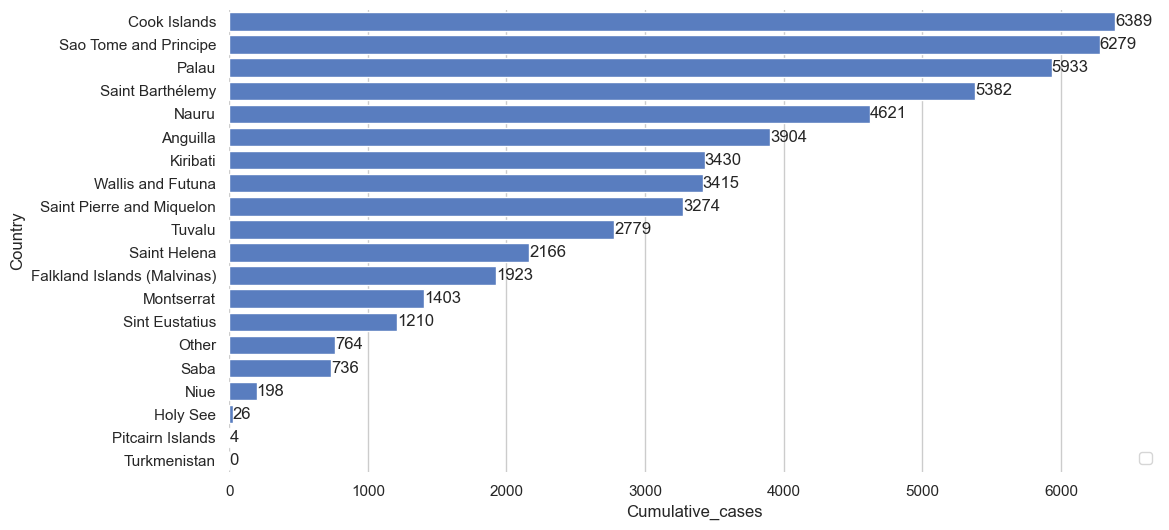

In [37]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("muted")
sns.barplot(x='Cumulative_cases', y="Country", data=bottom_20_cumul_cases, color="b")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)

In [38]:
co_w_va_cumul_deaths = co_w_va_cumul.sort_values(by='Cumulative_deaths', ascending=False)
co_w_va_cumul_deaths.head(20)

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
0,98072469.0,United States of America,AMRO,1265520.0,5061.0,1074367.0,2022-12-12,NaN
4,35497781.0,Brazil,AMRO,298408.0,4249.0,690577.0,2022-12-12,4.765237e+08
1,44674981.0,India,SEARO,414188.0,6148.0,530658.0,2022-12-12,2.199695e+09
9,21671528.0,Russian Federation,EURO,203949.0,1254.0,392661.0,2022-12-12,NaN
18,7152852.0,Mexico,AMRO,81032.0,1495.0,330633.0,2022-12-12,2.250631e+08
34,4330521.0,Peru,AMRO,59470.0,843.0,217566.0,2022-12-12,8.625211e+07
8,24053576.0,The United Kingdom,EURO,275647.0,1370.0,197723.0,2022-12-12,NaN
7,24709404.0,Italy,EURO,228123.0,993.0,182419.0,2022-12-12,1.430571e+08
19,6700015.0,Indonesia,SEARO,64718.0,2069.0,160255.0,2022-12-12,4.444601e+08
3,36758926.0,Germany,EURO,307917.0,1296.0,158966.0,2022-12-12,1.900444e+08


In [39]:
top_20_cumul_deaths = co_w_va_cumul_deaths[:21]
top_20_cumul_deaths

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
0,98072469.0,United States of America,AMRO,1265520.0,5061.0,1074367.0,2022-12-12,NaN
4,35497781.0,Brazil,AMRO,298408.0,4249.0,690577.0,2022-12-12,4.765237e+08
1,44674981.0,India,SEARO,414188.0,6148.0,530658.0,2022-12-12,2.199695e+09
9,21671528.0,Russian Federation,EURO,203949.0,1254.0,392661.0,2022-12-12,NaN
18,7152852.0,Mexico,AMRO,81032.0,1495.0,330633.0,2022-12-12,2.250631e+08
34,4330521.0,Peru,AMRO,59470.0,843.0,217566.0,2022-12-12,8.625211e+07
8,24053576.0,The United Kingdom,EURO,275647.0,1370.0,197723.0,2022-12-12,NaN
7,24709404.0,Italy,EURO,228123.0,993.0,182419.0,2022-12-12,1.430571e+08
19,6700015.0,Indonesia,SEARO,64718.0,2069.0,160255.0,2022-12-12,4.444601e+08
3,36758926.0,Germany,EURO,307917.0,1296.0,158966.0,2022-12-12,1.900444e+08


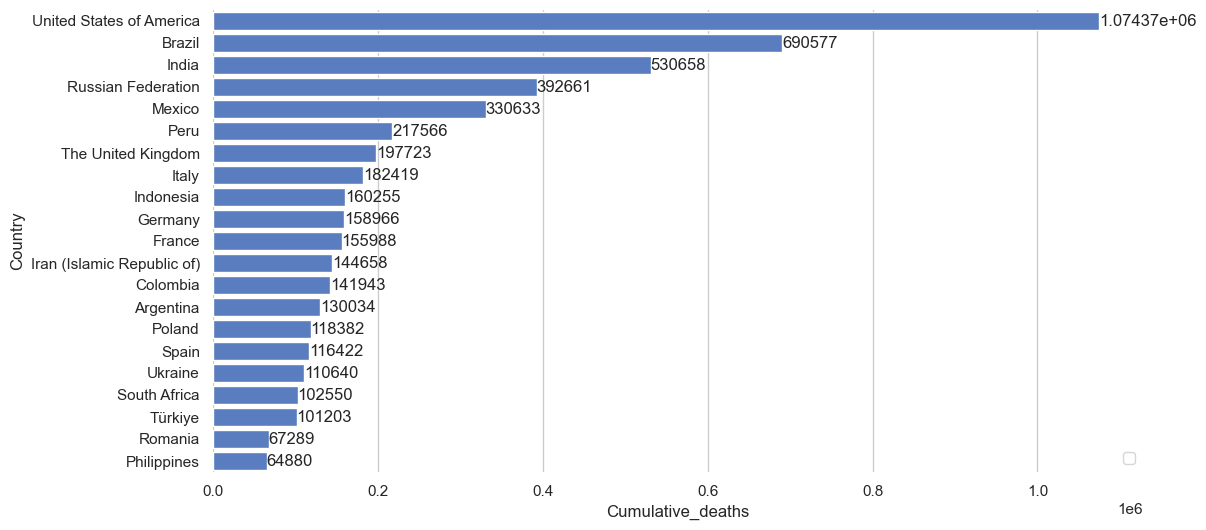

In [40]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("muted")
sns.barplot(x='Cumulative_deaths', y="Country", data=top_20_cumul_deaths, color="b")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)

In [41]:
bottom_20_cumul_deaths = co_w_va_cumul_deaths[-20:]
bottom_20_cumul_deaths

,Cumulative_cases,Country,WHO_region,New_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
229,764.0,Other,Other,99.0,2.0,13.0,2022-12-12,NaN
221,3430.0,Kiribati,WPRO,350.0,5.0,13.0,2022-12-12,193491.0
220,3904.0,Anguilla,AMRO,196.0,1.0,12.0,2022-12-12,24441.0
186,16182.0,Tonga,WPRO,1100.0,4.0,12.0,2022-12-12,207744.0
227,1403.0,Montserrat,AMRO,201.0,2.0,8.0,2022-12-12,4564.0
217,5933.0,Palau,WPRO,322.0,6.0,7.0,2022-12-12,NaN
222,3415.0,Wallis and Futuna,WPRO,2654.0,7.0,7.0,2022-12-12,17959.0
218,5382.0,Saint Barthélemy,AMRO,502.0,2.0,5.0,2022-12-12,NaN
228,1210.0,Sint Eustatius,AMRO,142.0,2.0,5.0,2022-12-12,NaN
230,736.0,Saba,AMRO,126.0,1.0,2.0,2022-12-12,NaN


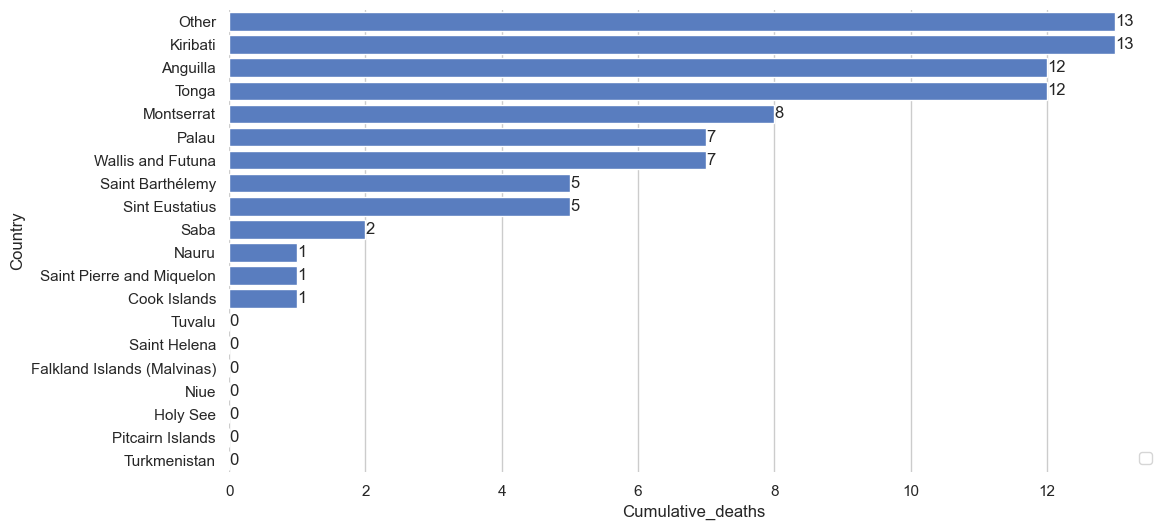

In [42]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("muted")
sns.barplot(x='Cumulative_deaths', y="Country", data=bottom_20_cumul_deaths, color="b")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)

In [43]:
co_w_va_cumul_original = covid_with_vaccinations.groupby('Country').max().sort_values(by='Cumulative_deaths', ascending=False)
co_w_va_cumul_original = co_w_va_cumul_original.reset_index()
co_w_va_cumul_original.head(50)

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
0,United States of America,AMRO,1265520.0,98072469.0,5061.0,1074367.0,2022-12-12,NaN
1,Brazil,AMRO,298408.0,35497781.0,4249.0,690577.0,2022-12-12,4.765237e+08
2,India,SEARO,414188.0,44674981.0,6148.0,530658.0,2022-12-12,2.199695e+09
3,Russian Federation,EURO,203949.0,21671528.0,1254.0,392661.0,2022-12-12,NaN
4,Mexico,AMRO,81032.0,7152852.0,1495.0,330633.0,2022-12-12,2.250631e+08
5,Peru,AMRO,59470.0,4330521.0,843.0,217566.0,2022-12-12,8.625211e+07
6,The United Kingdom,EURO,275647.0,24053576.0,1370.0,197723.0,2022-12-12,NaN
7,Italy,EURO,228123.0,24709404.0,993.0,182419.0,2022-12-12,1.430571e+08
8,Indonesia,SEARO,64718.0,6700015.0,2069.0,160255.0,2022-12-12,4.444601e+08
9,Germany,EURO,307917.0,36758926.0,1296.0,158966.0,2022-12-12,1.900444e+08


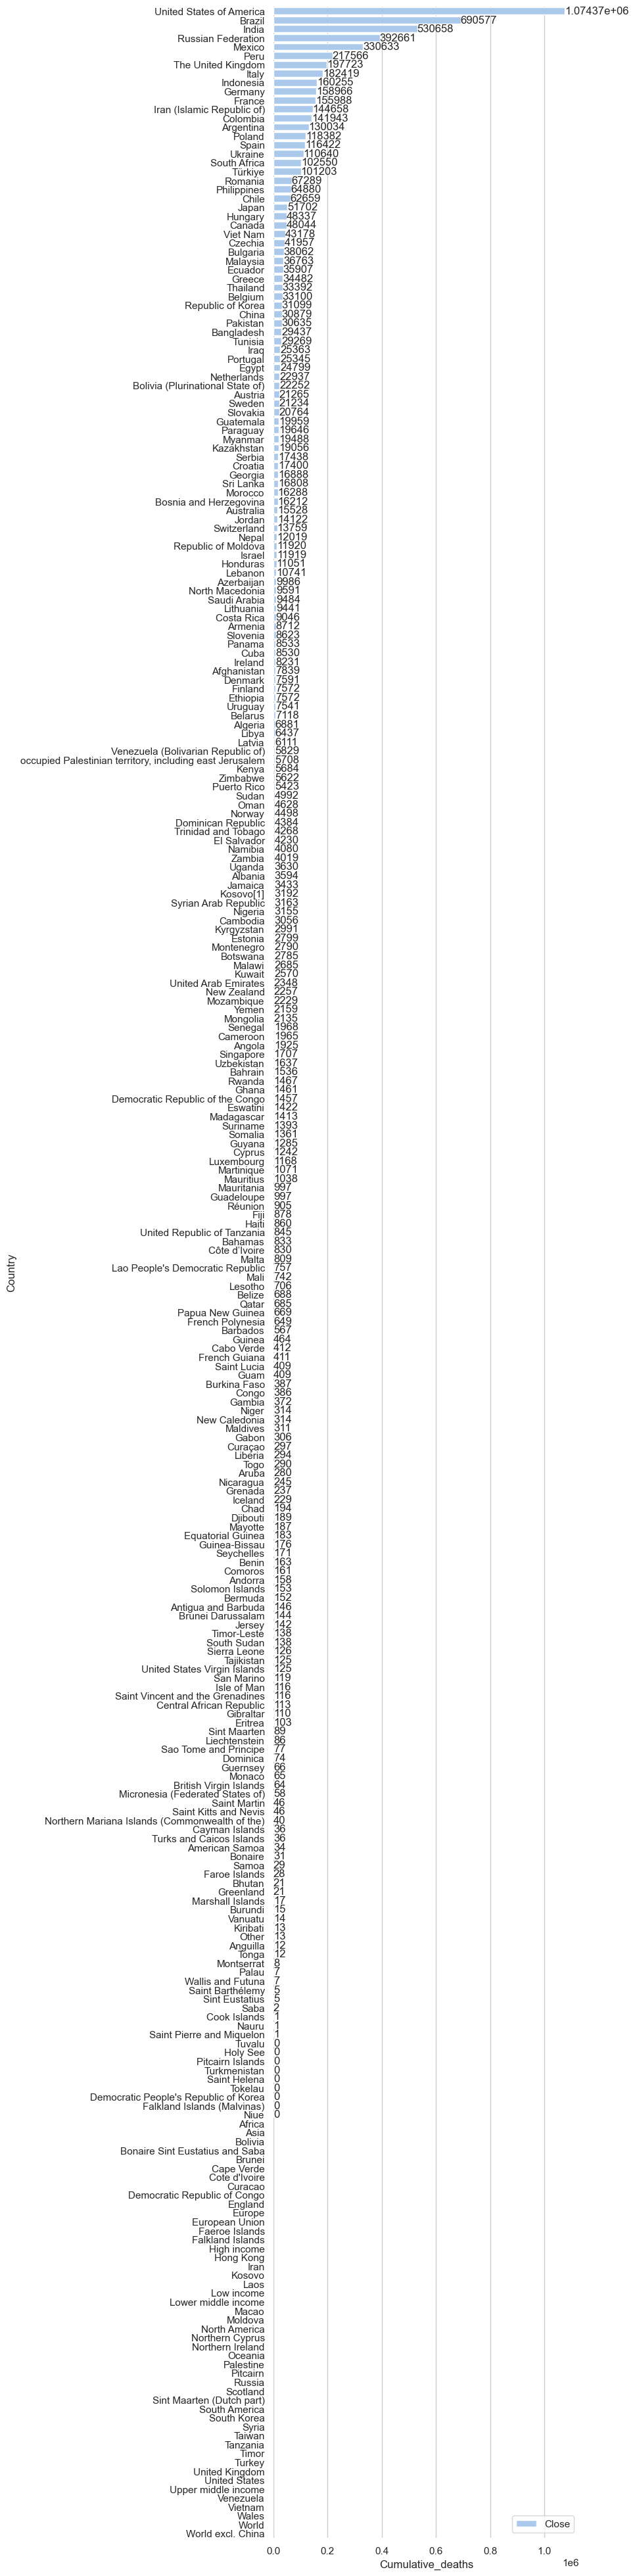

In [44]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 50))

sns.set_color_codes("pastel")
sns.barplot(x='Cumulative_deaths', y="Country", data=co_w_va_cumul_original,
            label="Close", color="b")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)

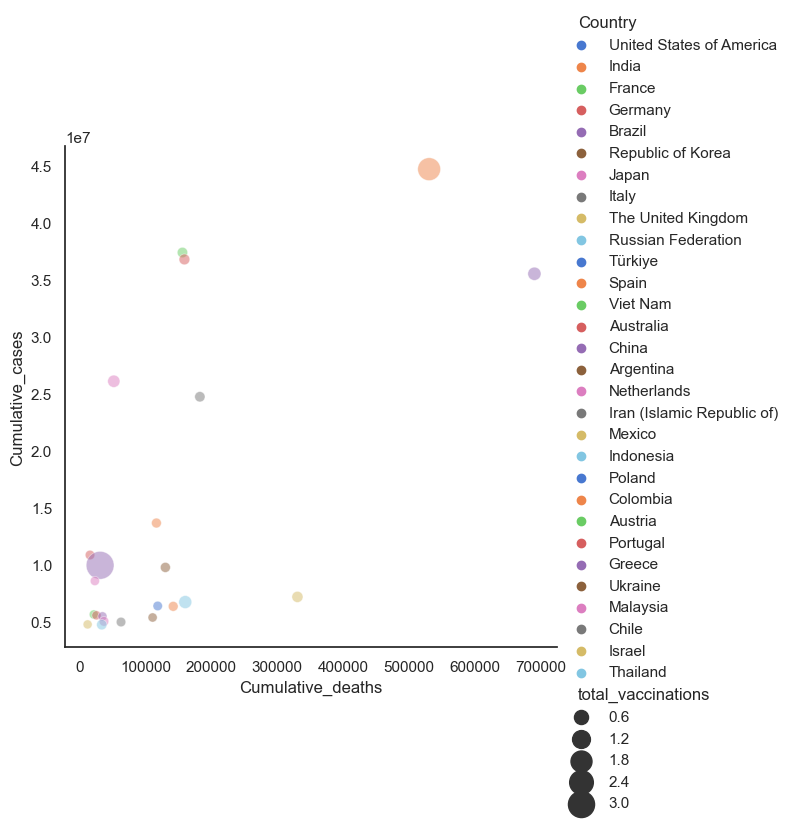

In [45]:
sns.set_theme(style="white")

sns.relplot(x=co_w_va_cumul["Cumulative_deaths"][:30], y=co_w_va_cumul["Cumulative_cases"][:30], hue=co_w_va_cumul["Country"][:30], size="total_vaccinations",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=co_w_va_cumul)

uhhhhhhh do daily per some countries showing each days value in accumulation and then vaccine values adding later and stuffness

cumulative deaths and cumulative cases correlation

<AxesSubplot:>

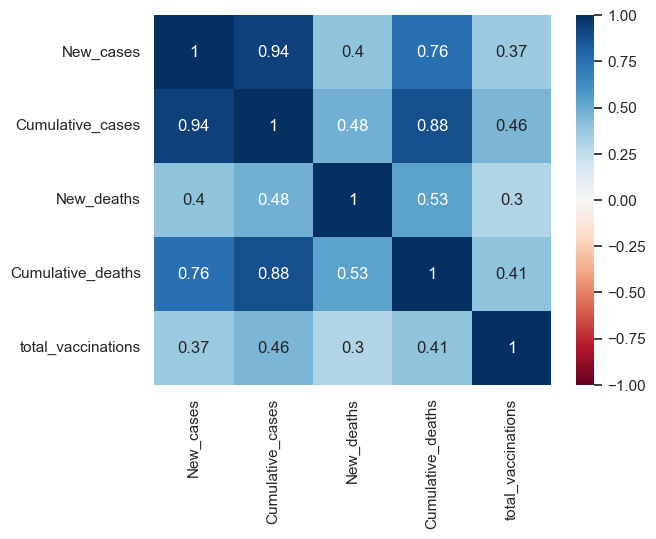

In [46]:
corr = co_w_va_cumul_original.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [47]:
covid_with_vaccinations.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
0,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-03,NaN
1,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-04,NaN
2,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-05,NaN
3,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-06,NaN
4,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2020-01-07,NaN


In [48]:
aa = covid_with_vaccinations.sort_values(by='Cumulative_cases', ascending=False)
aa

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
244022,United States of America,AMRO,0.0,98072469.0,0.0,1074367.0,2022-12-10,NaN
244021,United States of America,AMRO,454077.0,98072469.0,3122.0,1074367.0,2022-12-09,NaN
244024,United States of America,AMRO,0.0,98072469.0,0.0,1074367.0,2022-12-12,NaN
244023,United States of America,AMRO,0.0,98072469.0,0.0,1074367.0,2022-12-11,NaN
244016,United States of America,AMRO,0.0,97618392.0,0.0,1071245.0,2022-12-04,NaN
...,...,...,...,...,...,...,...,...
275045,World excl. China,NaN,NaN,NaN,NaN,NaN,2022-12-08,9.766759e+09
275046,World excl. China,NaN,NaN,NaN,NaN,NaN,2022-12-09,9.768039e+09
275047,World excl. China,NaN,NaN,NaN,NaN,NaN,2022-12-10,9.769009e+09
275048,World excl. China,NaN,NaN,NaN,NaN,NaN,2022-12-11,9.769645e+09


In [49]:
eight_mil_cases = covid_with_vaccinations[(covid_with_vaccinations.Cumulative_cases >= 8000000)]
eight_mil_cases

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
9352,Argentina,AMRO,93851.0,8061969.0,420.0,123946.0,2022-01-24,86895070.0
9353,Argentina,AMRO,90435.0,8152404.0,400.0,124346.0,2022-01-25,87243350.0
9354,Argentina,AMRO,76663.0,8229067.0,357.0,124703.0,2022-01-26,87588515.0
9355,Argentina,AMRO,65642.0,8294709.0,287.0,124990.0,2022-01-27,87941570.0
9356,Argentina,AMRO,58445.0,8353154.0,262.0,125252.0,2022-01-28,88290586.0
...,...,...,...,...,...,...,...,...
250470,Viet Nam,WPRO,500.0,11519011.0,0.0,43178.0,2022-12-08,NaN
250471,Viet Nam,WPRO,498.0,11519509.0,0.0,43178.0,2022-12-09,NaN
250472,Viet Nam,WPRO,9528.0,11529037.0,0.0,43178.0,2022-12-10,NaN
250473,Viet Nam,WPRO,408.0,11529445.0,0.0,43178.0,2022-12-11,NaN


data=df[(df.Station == 'Dhaka') & (df.Year.between(1970, 1999, inclusive=False))]

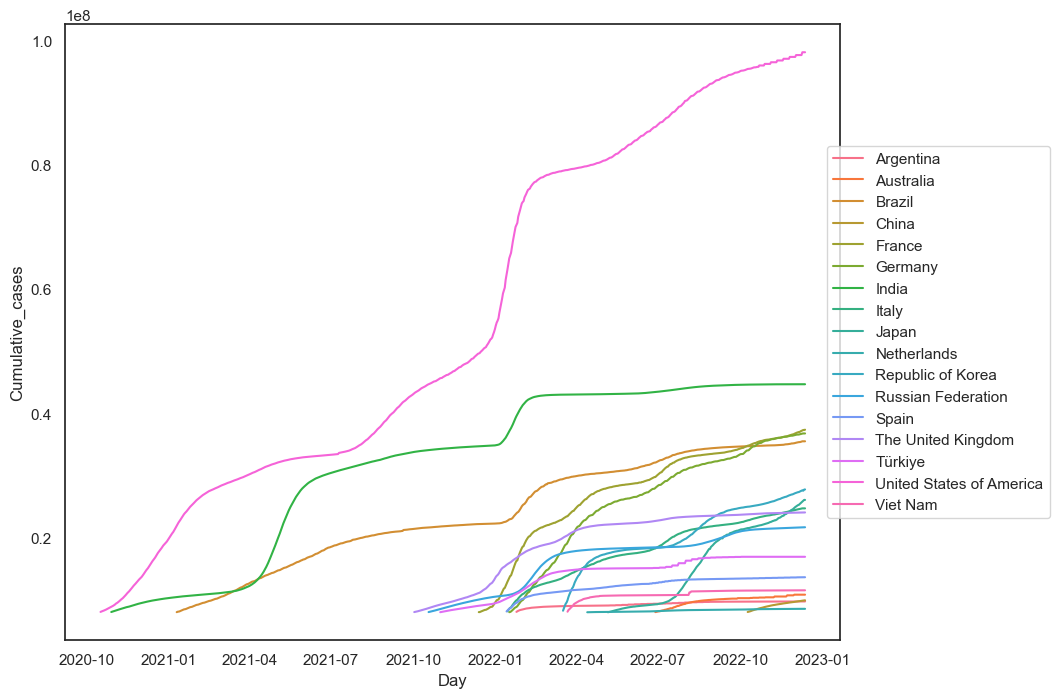

In [50]:
f, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=eight_mil_cases, x="Day", y="Cumulative_cases", hue="Country")
plt.legend(loc='right', bbox_to_anchor=(1.28, 0.5))

In [54]:
hundred_fifty_k_deaths = covid_with_vaccinations[(covid_with_vaccinations.Cumulative_deaths >= 150000)]
hundred_fifty_k_deaths

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,total_vaccinations
30383,Brazil,AMRO,26749.0,5082637.0,559.0,150198.0,2020-10-12,NaN
30384,Brazil,AMRO,12342.0,5094979.0,290.0,150488.0,2020-10-13,NaN
30385,Brazil,AMRO,8429.0,5103408.0,201.0,150689.0,2020-10-14,NaN
30386,Brazil,AMRO,10220.0,5113628.0,309.0,150998.0,2020-10-15,NaN
30387,Brazil,AMRO,27235.0,5140863.0,749.0,151747.0,2020-10-16,NaN
...,...,...,...,...,...,...,...,...
244020,United States of America,AMRO,0.0,97618392.0,0.0,1071245.0,2022-12-08,NaN
244021,United States of America,AMRO,454077.0,98072469.0,3122.0,1074367.0,2022-12-09,NaN
244022,United States of America,AMRO,0.0,98072469.0,0.0,1074367.0,2022-12-10,NaN
244023,United States of America,AMRO,0.0,98072469.0,0.0,1074367.0,2022-12-11,NaN


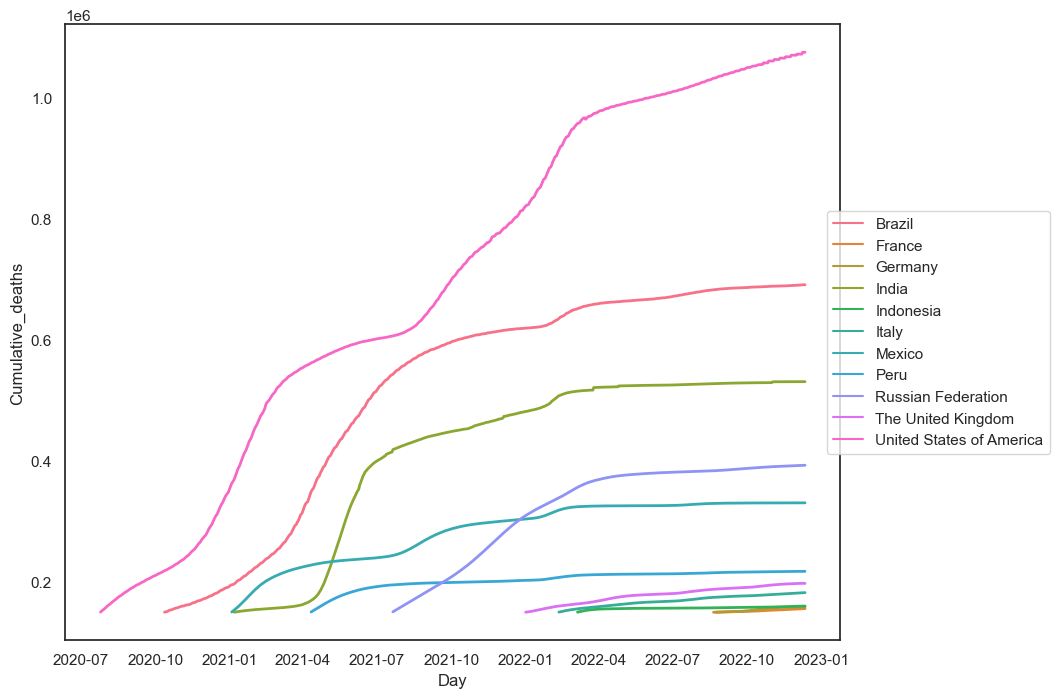

In [52]:
f, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=hundred_fifty_k_deaths, x="Day", y="Cumulative_deaths", hue="Country", linewidth = 2)
plt.legend(loc='right', bbox_to_anchor=(1.28, 0.5))